<a href="https://colab.research.google.com/github/vannessa01/Statistics/blob/main/Statistics_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

Nama: Vannessa Yoanita Oktorio Naibaho

Kelas: Rakamin DS 19A

In [ ]:
## Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency
import statsmodels.stats.proportion as sp
import numpy as np

In [ ]:
pd.options.display.max_columns = None

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Soal Nomor 1

In [ ]:
a = data['SalePrice']

#### Ukuran Pemusatan

In [ ]:
print('rata-rata: ',a.mean())
print('median: ',a.median())
print('modus: ',a.mode()[0])
print('percentile: ',a.quantile(0.9))
print('Q1: ',a.quantile(0.25))
print('Q2: ',a.quantile(0.5))
print('Q3: ',a.quantile(0.75))

rata-rata:  180921.19589041095
median:  163000.0
modus:  140000
percentile:  278000.0
Q1:  129975.0
Q2:  163000.0
Q3:  214000.0


#### Ukuran Penyebaran

In [ ]:
print('variance: ',a.var())
print('standar deviasi: ',a.std())
print('inter quartile range: ',a.quantile(0.75)-a.quantile(0.25))
print('range: ',a.max()-a.min())

variance:  6311111264.297451
standar deviasi:  79442.50288288663
inter quartile range:  84025.0
range:  720100


#### Interpretasi

dilihat dari nilai mean yang lebih besar dari median, maka tipe distribusi datanya adalah tipe positively skewed. hal ini bisa disebabkan oleh harga dari rumah yang lebih mewah memilihi harga yang juga sangat mahal, sehingga membuat rata-rata harga menjadi tinggi. Sementara range harga rumah yang diminati adalah 129975 (Q1) - 214000 (Q3).

# Soal Nomor 2

#### Ukuran Pemusatan

In [ ]:
def modus(a):
    return a.mode()[0]

In [ ]:
def percentile(a):
    return a.quantile(0.9)

In [ ]:
def q1(a):
    return a.quantile(0.25)

In [ ]:
def q2(a):
    return a.quantile(0.5)

In [ ]:
def q3(a):
    return a.quantile(0.75)

In [ ]:
data.groupby('YrSold').agg({'SalePrice':['mean','median', modus, percentile, q1, q2, q3]})

SalePrice                                                   \
                 mean    median   modus percentile        q1        q2   
YrSold                                                                   
2006    182549.458599  163995.0  140000   275000.0  131375.0  163995.0   
2007    186063.151976  167000.0  129000   290000.0  129900.0  167000.0   
2008    177360.838816  164000.0  140000   271000.0  131250.0  164000.0   
2009    179432.103550  162000.0  110000   275900.0  125250.0  162000.0   
2010    177393.674286  155000.0  128000   264900.0  128100.0  155000.0   

                  
              q3  
YrSold            
2006    218782.5  
2007    219500.0  
2008    207000.0  
2009    212750.0  
2010    213250.0

#### Ukuran Penyebaran

In [ ]:
def iqr(a):
    return a.quantile(0.75)-a.quantile(0.25)

In [ ]:
def rangee(a):
    return a.max()-a.min()

In [ ]:
data.groupby('YrSold').agg({'SalePrice':['var', 'std', rangee, iqr]})

SalePrice                               
                 var           std  rangee      iqr
YrSold                                             
2006    6.308623e+09  79426.838855  589689  87407.5
2007    7.356179e+09  85768.171410  715700  89600.0
2008    4.863055e+09  69735.610685  406261  75750.0
2009    6.541451e+09  80879.237311  548033  87500.0
2010    6.472408e+09  80451.280085  556657  85150.0

#### Interpretasi

Berdasarkan keterangan di atas dapat diketahui bahwa setiapp tahunnya nilai mean selalu lebih besar dibandingkan nilai median, yang berarti tipe distribusi data tidap tahunnya adala positif skewed.

# Soal Nomor 3

#### Grafik Histogram

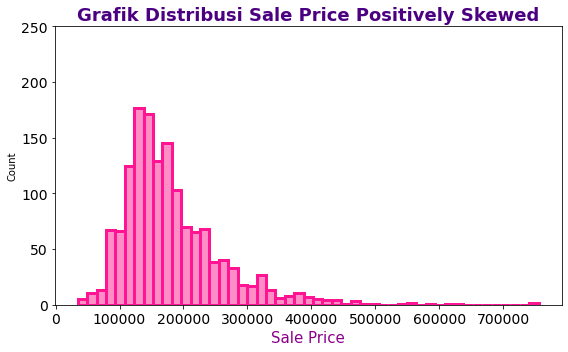

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(x = data['SalePrice'], data = data,
            color = 'hotpink',
            edgecolor= 'deeppink', 
            linewidth = 3)

plt.title('Grafik Distribusi Sale Price Positively Skewed',color='indigo',fontsize=18,fontweight='bold')
plt.xlabel('Sale Price', color= 'darkmagenta', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);
plt.ylim(0,250)
plt.tight_layout()
plt.show()

#### Analisa

Dari grafik diketahui bahwa tipe distribusi data adalah postively skewed. ukuran pemusatan data yang cocok digunakan adalah median. 

#### Interpretasi

Dari grafik diketahui bahwa tipe distribusi data adalah postively skewed, dimana mean > median > modus. dari grafik diketahui bahwa terdapat data pencilan (outlier) yang banyak disebelah kanan sehingga rata-rata tertarik ke sebelah kanan, yaitu harga rumah mewah yang lebih tinggi dibanding jenis rumah lainnya. Adanya outlier menyebabkan ukuran pemusatan tidak dapat menggunakan rata-rata, karena rata-rata sangat dipengaruhi oleh data pencilan. Sehingga ukuran pemusatan yang dapat digunakan adalah median karena tidak dipengaruhi oleh outlier, sehingga sangat cocok digunakan untuk mewakili data yang distribusinya tidak homogen.

# Soal Nomor 4

#### Penentuan hipotesis

Pernyataan hipotesis: Harga rumah setiap tahun naik

H0 = rata-rata dari harga rumah setiap tahunnya tidak terdapat perbedaan yang nyata //
H1 = rata-rata dari harga rumah setiap tahunnya berbeda

#### Pengujian yang digunakan 

one way ANOVA

#### Hasil pengujian hipotesis

In [ ]:
data.groupby('YrSold').agg({'SalePrice':['mean']})

,SalePrice
,mean
YrSold,
2006,182549.458599
2007,186063.151976
2008,177360.838816
2009,179432.103550
2010,177393.674286


In [ ]:
df1 = data[data['YrSold'] == 2006]
df2 = data[data['YrSold'] == 2007]
df3 = data[data['YrSold'] == 2008]
df4 = data[data['YrSold'] == 2009]
df5 = data[data['YrSold'] == 2010]

In [ ]:
ftest = st.f_oneway(df1['SalePrice'],df2['SalePrice'],df3['SalePrice'],df4['SalePrice'],df5['SalePrice'])

In [ ]:
pvalue = ftest.pvalue
pvalue

0.6300887663573457

In [ ]:
print(pvalue)
if pvalue >= 0.05:
  print('Insufficient Reject H0')
else:
  print('Sufficient Reject H0')

0.6300887663573457
Insufficient Reject H0


#### Kesimpulan dan interpretasi

berdasarkan hasil uji anova dapat disimpulkan bahwa rata-rata harga rumah setiap tahunnya tidak terdapat perbedaan atau kenaikan yang nyata. hal ini terlihat dari perhitungan rata-rata harga rumah setiap tahunnya yang tidak berbeda jauh yaitu pada range 177360.838816 - 186063.151976.

# Soal Nomor 5

In [ ]:
db = pd.read_csv('bank-full.csv', engine='python', sep=None)

In [ ]:
db

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
z = db.sort_values(by=["campaign"])
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
27794,43,management,married,tertiary,no,344,yes,yes,cellular,28,jan,282,1,238,2,failure,no
27793,30,management,single,tertiary,no,1572,no,no,cellular,28,jan,200,1,-1,0,unknown,no
27792,52,services,married,secondary,no,393,yes,yes,cellular,28,jan,446,1,182,8,failure,no
27791,57,services,divorced,primary,no,362,no,no,cellular,28,jan,91,1,231,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459,35,blue-collar,married,secondary,no,430,yes,no,unknown,23,may,147,50,-1,0,unknown,no
4299,30,management,single,tertiary,no,358,yes,no,unknown,19,may,88,51,-1,0,unknown,no
5073,35,technician,married,secondary,no,432,yes,no,unknown,21,may,1094,55,-1,0,unknown,no
11914,24,technician,single,primary,no,126,yes,no,unknown,20,jun,10,58,-1,0,unknown,no


### Pemahaman konsep A/B Testing

#### Nama experiment

AB Test Number of Campaigns To Increase User Desire To Open a Deposit Account

#### Hipotesis

Number of campaigns will increase the user desire to open a deposit account

#### Participant

Users that offered to open a deposit account

#### Variabel yang akan diuji

Campaign and Y

#### Metrics yang akan digunakan

Macroconversions: user registeration rate

#### Jumlah sample size dan durasi experiment

In [ ]:
db.shape

(45211, 17)

In [ ]:
N = 45211
e = 0.05

In [ ]:
slovin = N/(1+N * e**2)
slovin

396.4920742803271

Jumlah sample: 400

Durasi eksperiment: 1 minggu

### Pengujian Hipotesis

#### Penentuan hipotesis

H0 = tidak terdapat perbedaan rata-rata jumlah user yang tertarik berdasarkan jumlah campaign yang nyata.

H1 = terdapat perbedaan nyata rata-rata jumlah user yang tertarik berdasarkan jumlah campaign.

In [ ]:
db.groupby(['y'],as_index=False).count()

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1,yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [ ]:
db_sample = db.groupby(['y']).apply(lambda x: x.sample(n=200,random_state=123))
db_sample

age         job  marital  education default  balance housing loan  \
y                                                                              
no  36755   41  management   single  secondary      no     5548     yes   no   
    21913   44  management  married   tertiary      no        0      no   no   
    27933   29     unknown   single  secondary      no     1502      no   no   
    41893   60  management  married  secondary      no        0      no   no   
    25719   30  management   single   tertiary      no     4896      no   no   
...        ...         ...      ...        ...     ...      ...     ...  ...   
yes 44254   34  unemployed   single   tertiary      no     1974      no   no   
    40878   41  management  married   tertiary      no    27696      no   no   
    22923   32  management   single   tertiary      no     2536     yes   no   
    42872   32     student   single   tertiary      no        0      no   no   
    40453   54      admin.  married  secondary      no     1633      no   no   

             contact  day month  duration  campaign  pdays  previous poutcome  \
y                                                                               
no  36755   cellular   12   may       128         2     -1         0  unknown   
    21913   cellular   20   aug       122         2     -1         0  unknown   
    27933   cellular   28   jan        59         1     -1         0  unknown   
    41893  telephone   19   oct      1745         3     62         3  failure   
    25719   cellular   19   nov       132         1     -1         0  unknown   
...              ...  ...   ...       ...       ...    ...       ...      ...   
yes 44254   cellular   22   jul       355         1    342         3  success   
    40878   cellular   12   aug       147         2    104         1  failure   
    22923   cellular   26   aug       958         6     -1         0  unknown   
    42872   cellular    4   feb       233         3    276         2  failure   
    40453   cellular    3   jul       409         2     -1         0  unknown   

             y  
y               
no  36755   no  
    21913   no  
    27933   no  
    41893   no  
    25719   no  
...        ...  
yes 44254  yes  
    40878  yes  
    22923  yes  
    42872  yes  
    40453  yes  

[400 rows x 17 columns]

In [ ]:
db_sample['y'].value_counts()

no     200
yes    200
Name: y, dtype: int64

In [ ]:
db_sample.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 400 entries, ('no', 36755) to ('yes', 40453)
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        400 non-null    int64 
 1   job        400 non-null    object
 2   marital    400 non-null    object
 3   education  400 non-null    object
 4   default    400 non-null    object
 5   balance    400 non-null    int64 
 6   housing    400 non-null    object
 7   loan       400 non-null    object
 8   contact    400 non-null    object
 9   day        400 non-null    int64 
 10  month      400 non-null    object
 11  duration   400 non-null    int64 
 12  campaign   400 non-null    int64 
 13  pdays      400 non-null    int64 
 14  previous   400 non-null    int64 
 15  poutcome   400 non-null    object
 16  y          400 non-null    object
dtypes: int64(7), object(10)
memory usage: 73.7+ KB


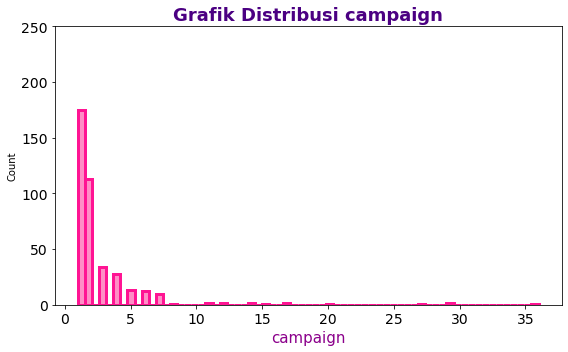

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(x = db_sample['campaign'], data = db_sample,
            color = 'hotpink',
            edgecolor= 'deeppink', 
            linewidth = 3)

plt.title('Grafik Distribusi campaign',color='indigo',fontsize=18,fontweight='bold')
plt.xlabel('campaign', color= 'darkmagenta', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);
plt.ylim(0,250)
plt.tight_layout()
plt.show()

#### Pengujian yang digunakan

uji statisik yang digunakan adalah ttest.

#### Deteksi asumsi beserta cara penanganannya

Asumsi peneliti adalah jumlah campaign mampu mempengaruhi keinginan user untuk membuka akun deposit. untuk menguji hipotesis ini dapat melakukan uji statistik ttest.

#### Hasil pengujian hipotesis

In [ ]:
No = db_sample[db_sample['y']=='no']
Yes = db_sample[db_sample['y']=='yes']

In [ ]:
ttest = st.ttest_ind(a = Yes['campaign'], b=No['campaign'])
p_value = ttest.pvalue

In [ ]:
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Insufficient Reject H0')
else:
    print('Sufficient Reject H0')

P-Value : 0.014343371543715252
Sufficient Reject H0


#### Kesimpulan dan interpretasi

Berdasarkan hasil uji test yang telah dilakukan dapat disimpulkan bahwa cukup bukti untuk menolak H0/ menerima H1 yang berisi terdapat perbedaan nyata rata-rata jumlah user yang tertarik berdasarkan jumlah campaign. Asumsi peneliti adalah jumlah campaign mampu mempengaruhi keinginan user untuk membuka akun deposit dinyatakan benar. Hal ini bisa terjadi karena jumlah campaign yang tepat mampu memperkenalkan produk dan meyakinkan user/ nasabah untuk membuka akun deposit.